1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

### En ambos ejemplos la planta que corresponde es la: Virginica tanto para K=3 como para K=7
### El acierto para K=3 es:0.9333333333333333. Para K=7 es: 0.9666666666666667
### Con entrenamiento los k con mejor acierto del modelo son: 2 y del 6 al 16 (sin entrenamiento (toda la base) son k: 8, 10, 12, 14 y 16)
### Sí cambian los resultados de K entre 1 y 20 con un conjunto de test con el 60%. Los aciertos empeoran. Quizás porque la muestra de entrenamiento es baja. Únicamente de un 40%. El conjunto de test pasa a ser de entrenamiento
### Sí cambian los resultados eliminando la clase 'Setosa' Son peores
### Sí es un buen algoritmo para estos datos. Los resultados son coherentes con el modelo de regresión logística. En el de regresión con las clases Setosa y Versicolor el % de aciertos era del 100% (empeoraban al incluir la clase Virginica) con el modelo Knn cuando se elimina la clase 'Setosa' los aciertos disminuyen. Utilizar la clase Virginica empeora sistemáticamente la probabilidad de acertar. Son la clase Setosa y Versicolor las que son predecibles con mayor precisión a partir de la longitud y ancho de pétalos y sépalos 

In [42]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
#from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [43]:
df = pd.read_csv("../data/iris.csv", sep=',', header=0)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [44]:
# Establecemos las variables que serán independientes (X) y la dependiente (y)
df2 = df.iloc[:, :4]
X = df2.values
y = df ['variety']

In [45]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


## K = 3

In [46]:
from sklearn.neighbors import KNeighborsClassifier

# Creamos el modelo de clasificación KNN para K = 3
knn = KNeighborsClassifier(n_neighbors=3)
#Aplicamos el modelo en toda la base
knn.fit(X, y)



KNeighborsClassifier(n_neighbors=3)

In [47]:
X_to_pred = np.array([15.7,2.8,9.5,0.1])
X_to_pred = X_to_pred.reshape(1, -1)
X_to_pred

array([[15.7,  2.8,  9.5,  0.1]])

In [48]:
y_pred = knn.predict(X_to_pred)
y_pred

array(['Virginica'], dtype=object)

In [49]:
X_to_pred = np.array([1.7,3.8,4.5,11.3])
X_to_pred = X_to_pred.reshape(1, -1)
X_to_pred

array([[ 1.7,  3.8,  4.5, 11.3]])

In [50]:
y_pred = knn.predict(X_to_pred)
y_pred

array(['Virginica'], dtype=object)

In [51]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [52]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier: 3
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
y_pred

array(['Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Setosa',
       'Virginica', 'Virginica', 'Versicolor', 'Versicolor', 'Virginica',
       'Virginica', 'Virginica', 'Versicolor', 'Versicolor', 'Versicolor',
       'Virginica', 'Virginica', 'Virginica', 'Setosa', 'Setosa',
       'Setosa', 'Versicolor', 'Virginica', 'Setosa', 'Virginica',
       'Virginica', 'Virginica', 'Versicolor', 'Setosa', 'Setosa'],
      dtype=object)

In [53]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


## K = 7

In [35]:
# Creamos el modelo de clasificación KNN para K = 7
knn = KNeighborsClassifier(n_neighbors=7)
#Aplicamos el modelo en toda la base
knn.fit(X , y)

X_to_pred = np.array([15.7,2.8,9.5,0.1])
X_to_pred = X_to_pred.reshape(1, -1)
X_to_pred

array([[15.7,  2.8,  9.5,  0.1]])

In [36]:
y_pred = knn.predict(X_to_pred)
y_pred

array(['Virginica'], dtype=object)

In [37]:
X_to_pred = np.array([1.7,3.8,4.5,11.3])
X_to_pred = X_to_pred.reshape(1, -1)
X_to_pred

array([[ 1.7,  3.8,  4.5, 11.3]])

In [38]:
y_pred = knn.predict(X_to_pred)
y_pred

array(['Virginica'], dtype=object)

In [39]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [54]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier: 3
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
y_pred

array(['Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Setosa',
       'Virginica', 'Virginica', 'Versicolor', 'Versicolor', 'Virginica',
       'Virginica', 'Virginica', 'Versicolor', 'Versicolor', 'Versicolor',
       'Virginica', 'Virginica', 'Virginica', 'Setosa', 'Setosa',
       'Setosa', 'Virginica', 'Virginica', 'Setosa', 'Virginica',
       'Virginica', 'Virginica', 'Versicolor', 'Setosa', 'Setosa'],
      dtype=object)

In [55]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


### K entre 1 y 20

([<matplotlib.axis.XTick at 0x24a2930c160>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

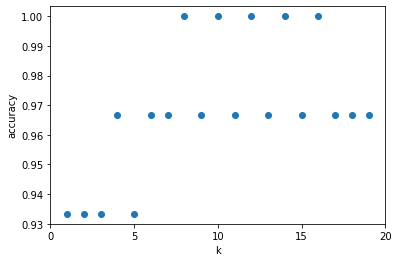

In [56]:
k_range = range(1, 20)
scores = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores[k] = knn.score(X_test, y_test)
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, list(scores.values()))
plt.xticks([0,5,10,15,20])

In [57]:
scores

{1: 0.9333333333333333,
 2: 0.9333333333333333,
 3: 0.9333333333333333,
 4: 0.9666666666666667,
 5: 0.9333333333333333,
 6: 0.9666666666666667,
 7: 0.9666666666666667,
 8: 1.0,
 9: 0.9666666666666667,
 10: 1.0,
 11: 0.9666666666666667,
 12: 1.0,
 13: 0.9666666666666667,
 14: 1.0,
 15: 0.9666666666666667,
 16: 1.0,
 17: 0.9666666666666667,
 18: 0.9666666666666667,
 19: 0.9666666666666667}

([<matplotlib.axis.XTick at 0x24a29b6b8e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

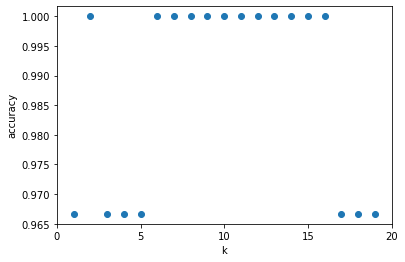

In [59]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

k_range = range(1, 20)
scores = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores[k] = knn.score(X_test, y_test)
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, list(scores.values()))
plt.xticks([0,5,10,15,20])

In [61]:
scores

{1: 0.9666666666666667,
 2: 1.0,
 3: 0.9666666666666667,
 4: 0.9666666666666667,
 5: 0.9666666666666667,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0,
 12: 1.0,
 13: 1.0,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 0.9666666666666667,
 18: 0.9666666666666667,
 19: 0.9666666666666667}

### Conjunto de test con el 60% de los datos

([<matplotlib.axis.XTick at 0x24a29a49790>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

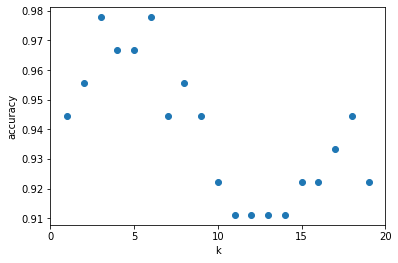

In [62]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=35)

k_range = range(1, 20)
scores = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores[k] = knn.score(X_test, y_test)
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, list(scores.values()))
plt.xticks([0,5,10,15,20])

In [63]:
scores

{1: 0.9444444444444444,
 2: 0.9555555555555556,
 3: 0.9777777777777777,
 4: 0.9666666666666667,
 5: 0.9666666666666667,
 6: 0.9777777777777777,
 7: 0.9444444444444444,
 8: 0.9555555555555556,
 9: 0.9444444444444444,
 10: 0.9222222222222223,
 11: 0.9111111111111111,
 12: 0.9111111111111111,
 13: 0.9111111111111111,
 14: 0.9111111111111111,
 15: 0.9222222222222223,
 16: 0.9222222222222223,
 17: 0.9333333333333333,
 18: 0.9444444444444444,
 19: 0.9222222222222223}

# Eliminamos la clase Setosa

In [67]:
df = pd.read_csv("../data/iris.csv", sep=',', header=0)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [80]:
# Elimino la clase Virgínica
df = df.drop(df[df['variety']=='Setosa'].index)

In [81]:
df3 = df.iloc[:, :4]
X = df3.values
y = df ['variety']

## K=3

In [84]:
from sklearn.neighbors import KNeighborsClassifier

# Creamos el modelo de clasificación KNN para K = 3
knn = KNeighborsClassifier(n_neighbors=3)
#Aplicamos el modelo en toda la base
knn.fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [85]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [86]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier: 3
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
y_pred

array(['Versicolor', 'Versicolor', 'Versicolor', 'Virginica', 'Virginica',
       'Versicolor', 'Virginica', 'Versicolor', 'Virginica', 'Versicolor',
       'Virginica', 'Virginica', 'Versicolor', 'Versicolor', 'Virginica',
       'Virginica', 'Versicolor', 'Virginica', 'Virginica', 'Versicolor'],
      dtype=object)

In [87]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9


## K=7

In [88]:
from sklearn.neighbors import KNeighborsClassifier

# Creamos el modelo de clasificación KNN para K = 7
knn = KNeighborsClassifier(n_neighbors=7)
#Aplicamos el modelo en toda la base
knn.fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [89]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [90]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier: 3
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
y_pred

array(['Virginica', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Versicolor', 'Virginica', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Versicolor'],
      dtype=object)

In [91]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9


## K entre 1 y 20

([<matplotlib.axis.XTick at 0x24a29b73130>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

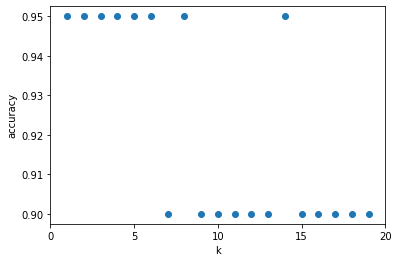

In [92]:
k_range = range(1, 20)
scores = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores[k] = knn.score(X_test, y_test)
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, list(scores.values()))
plt.xticks([0,5,10,15,20])

In [93]:
scores

{1: 0.95,
 2: 0.95,
 3: 0.95,
 4: 0.95,
 5: 0.95,
 6: 0.95,
 7: 0.9,
 8: 0.95,
 9: 0.9,
 10: 0.9,
 11: 0.9,
 12: 0.9,
 13: 0.9,
 14: 0.95,
 15: 0.9,
 16: 0.9,
 17: 0.9,
 18: 0.9,
 19: 0.9}

## Conjunto de test con el 60% de los datos

([<matplotlib.axis.XTick at 0x24a295adc10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

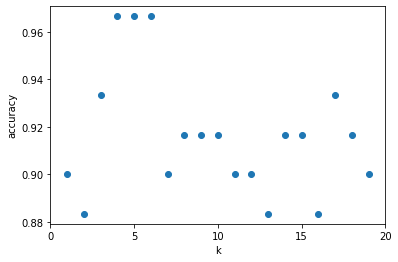

In [94]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=35)

k_range = range(1, 20)
scores = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores[k] = knn.score(X_test, y_test)
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, list(scores.values()))
plt.xticks([0,5,10,15,20])

In [95]:
scores

{1: 0.9,
 2: 0.8833333333333333,
 3: 0.9333333333333333,
 4: 0.9666666666666667,
 5: 0.9666666666666667,
 6: 0.9666666666666667,
 7: 0.9,
 8: 0.9166666666666666,
 9: 0.9166666666666666,
 10: 0.9166666666666666,
 11: 0.9,
 12: 0.9,
 13: 0.8833333333333333,
 14: 0.9166666666666666,
 15: 0.9166666666666666,
 16: 0.8833333333333333,
 17: 0.9333333333333333,
 18: 0.9166666666666666,
 19: 0.9}